In [66]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
import time

In [67]:
# Generate some sample data
# Replace this with your actual data
X_train = np.random.randn(1000, 10)
y_train = np.random.randint(2, size=(1000,))
X_test = np.random.randn(200, 10)
y_test = np.random.randint(2, size=(200,))

In [68]:
# Define the neural network architecture
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(10,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

### Dataset-1

#### Cardiovascular Disease

In [69]:
#Download dataset
data = pd.read_csv('cardio_train.csv', sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [71]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [72]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [73]:
data.drop("id",axis=1,inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]
len(data)

68983

In [74]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]

In [75]:
data.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805


In [76]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [78]:
data.shape

(68975, 13)

In [79]:
# Preparing to Modeling
target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

In [80]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'bmi'],
      dtype='object')

In [81]:
data.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,34.927679


In [82]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [83]:
train.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
31684,21263,2,160,76.0,130,80,1,1,0,1,1,29.687500
5634,14684,2,184,70.0,120,80,1,1,0,0,1,20.675803


In [84]:
test.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
51756,20272,1,161,75.0,120,80,1,1,0,0,1,28.934069
9378,21872,1,175,70.0,120,70,1,1,0,0,1,22.857143


In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55180 entries, 31684 to 69281
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          55180 non-null  int64  
 1   gender       55180 non-null  int64  
 2   height       55180 non-null  int64  
 3   weight       55180 non-null  float64
 4   ap_hi        55180 non-null  int64  
 5   ap_lo        55180 non-null  int64  
 6   cholesterol  55180 non-null  int64  
 7   gluc         55180 non-null  int64  
 8   smoke        55180 non-null  int64  
 9   alco         55180 non-null  int64  
 10  active       55180 non-null  int64  
 11  bmi          55180 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 5.5 MB


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13795 entries, 51756 to 61199
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          13795 non-null  int64  
 1   gender       13795 non-null  int64  
 2   height       13795 non-null  int64  
 3   weight       13795 non-null  float64
 4   ap_hi        13795 non-null  int64  
 5   ap_lo        13795 non-null  int64  
 6   cholesterol  13795 non-null  int64  
 7   gluc         13795 non-null  int64  
 8   smoke        13795 non-null  int64  
 9   alco         13795 non-null  int64  
 10  active       13795 non-null  int64  
 11  bmi          13795 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 1.4 MB


In [87]:
# train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=0)

### DataSet-2

#### Titanic DataSet

In [101]:
#Download dataset
traindf = pd.read_csv('Titanic-data/train (1).csv')
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
testdf = pd.read_csv('Titanic-data/test.csv')
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [103]:
submission = pd.read_csv('Titanic-data/test.csv')
submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:
# Feature Enginnering 
df = pd.concat([traindf, testdf], axis=0, sort=False)
df['Title'] = df.Name.str.split(',').str[1].str.split('.').str[0].str.strip()

In [105]:
df.shape

(1309, 13)

In [107]:
df['Title'] = df.Name.str.split(',').str[1].str.split('.').str[0].str.strip()
df['IsWomanOrBoy'] = ((df.Title == 'Master') | (df.Sex == 'female'))
df['LastName'] = df.Name.str.split(',').str[0]
family = df.groupby(df.LastName).Survived
df['WomanOrBoyCount'] = family.transform(lambda s: s[df.IsWomanOrBoy].fillna(0).count())
# df['WomanOrBoyCount'] = df.mask(df.IsWomanOrBoy, df.WomanOrBoyCount - 1, axis=0)
df['WomanOrBoyCount'] = df['WomanOrBoyCount'].mask(df['IsWomanOrBoy'], df['WomanOrBoyCount'] - 1)
df['FamilySurvivedCount'] = family.transform(lambda s: s[df.IsWomanOrBoy].fillna(0).sum())
# df['FamilySurvivedCount'] = df.mask(df.IsWomanOrBoy, df.FamilySurvivedCount - \
#                                     df.Survived.fillna(0), axis=0)

df['FamilySurvivedCount'] = df['FamilySurvivedCount'].mask(df['IsWomanOrBoy'], df['FamilySurvivedCount'] - df['Survived'].fillna(0))
df['WomanOrBoySurvived'] = df.FamilySurvivedCount / df.WomanOrBoyCount.replace(0, np.nan)
df.WomanOrBoyCount = df.WomanOrBoyCount.replace(np.nan, 0)
df['Alone'] = (df.WomanOrBoyCount == 0)
df['Title'] = df['Title'].replace('Ms','Miss')
df['Title'] = df['Title'].replace('Mlle','Miss')
df['Title'] = df['Title'].replace('Mme','Mrs')
df['Embarked'] = df['Embarked'].fillna('S')
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df.loc[(df['Deck'] == 'T'), 'Deck'] = 'A'
med_fare = df.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df['Fare'] = df['Fare'].fillna(med_fare)
#Age
df['Age'] = df.groupby(['Sex', 'Pclass', 'Title'])['Age'].apply(lambda x: x.fillna(x.median()))
# Family_Size
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
cols_to_drop = ['Name','Ticket','Cabin']
df = df.drop(cols_to_drop, axis=1)
df.WomanOrBoySurvived = df.WomanOrBoySurvived.fillna(0)
df.WomanOrBoyCount = df.WomanOrBoyCount.fillna(0)
df.FamilySurvivedCount = df.FamilySurvivedCount.fillna(0)
df.Alone = df.Alone.fillna(0)
target1 = df.Survived.loc[traindf.index]
df = df.drop(['Survived'], axis=1)
train1, test1 = df.loc[traindf.index], df.loc[testdf.index]
train1.head(3)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 5

### NN-1

In [46]:
# Define the neural network architecture
def build_ann(optimizer='adam'):
    ann = Sequential()
    ann.add(Dense(units=32, kernel_initializer='glorot_uniform', activation='relu', input_shape=(X_train.shape[1],)))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=64, kernel_initializer='glorot_uniform', activation='relu'))
    ann.add(Dropout(rate=0.5))
    ann.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return ann

In [47]:
# List of optimizers to test for NN-1
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
    'Adadelta': tf.keras.optimizers.Adadelta(),
    'Adamax': tf.keras.optimizers.Adamax(),
    'Nadam': tf.keras.optimizers.Nadam()
}


In [29]:
# # List of optimizers to test for the sample NN and dataset
# optimizers = {
#     'SGD': SGD(),
#     'Adam': Adam(),
#     'RMSprop': RMSprop(),
#     'Adagrad': Adagrad(),
#     'Adadelta': Adadelta(),
#     'Adamax': Adamax(),
#     'Nadam': Nadam()
# }

In [55]:
# Model Evaluation for NN-1
results = {}

for name, optimizer in optimizers.items():
    print(f"Training model with {name} optimizer...")
    model = build_ann(optimizer)
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    end_time = time.time()
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    training_time = end_time - start_time
    results[name] = {'test_accuracy': test_acc, 'convergence_speed': len(history.history['loss']), 'training_time': training_time, 'history': history}

Training model with SGD optimizer...
Training model with Adam optimizer...
Training model with RMSprop optimizer...
Training model with Adagrad optimizer...
Training model with Adadelta optimizer...
Training model with Adamax optimizer...
Training model with Nadam optimizer...


In [ ]:
# # Model Evaluation for the sample NN and dataset
# results = {}

# for name, optimizer in optimizers.items():
#     print(f"Training model with {name} optimizer...")
#     model = build_ann(optimizer)
#     start_time = time.time()
#     history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
#     end_time = time.time()
#     test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
#     training_time = end_time - start_time
#     results[name] = {'test_accuracy': test_acc, 'convergence_speed': len(history.history['loss']), 'training_time': training_time, 'history': history}

In [56]:
# results = {}

# for name, optimizer in optimizers.items():
#     print(f"Training model with {name} optimizer...")
#     model = create_model()
#     model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     start_time = time.time()
#     history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
#     end_time = time.time()
#     test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
#     training_time = end_time - start_time
#     results[name] = {'test_accuracy': test_acc, 'convergence_speed': len(history.history['loss']), 'training_time': training_time, 'history': history}

In [52]:
# Print results
print("\nResults:")
for name, result in results.items():
    print(f"{name}: Test Accuracy - {result['test_accuracy']:.4f}, "
          f"Convergence Speed - {result['convergence_speed']} epochs, "
          f"Training Time - {result['training_time']:.2f} seconds")


Results:
SGD: Test Accuracy - 0.5097, Convergence Speed - 10 epochs, Training Time - 49.79 seconds
Adam: Test Accuracy - 0.5097, Convergence Speed - 10 epochs, Training Time - 51.09 seconds
RMSprop: Test Accuracy - 0.5097, Convergence Speed - 10 epochs, Training Time - 62.17 seconds
Adagrad: Test Accuracy - 0.6539, Convergence Speed - 10 epochs, Training Time - 49.55 seconds
Adadelta: Test Accuracy - 0.4903, Convergence Speed - 10 epochs, Training Time - 49.97 seconds
Adamax: Test Accuracy - 0.5097, Convergence Speed - 10 epochs, Training Time - 50.06 seconds
Nadam: Test Accuracy - 0.5097, Convergence Speed - 10 epochs, Training Time - 83.82 seconds


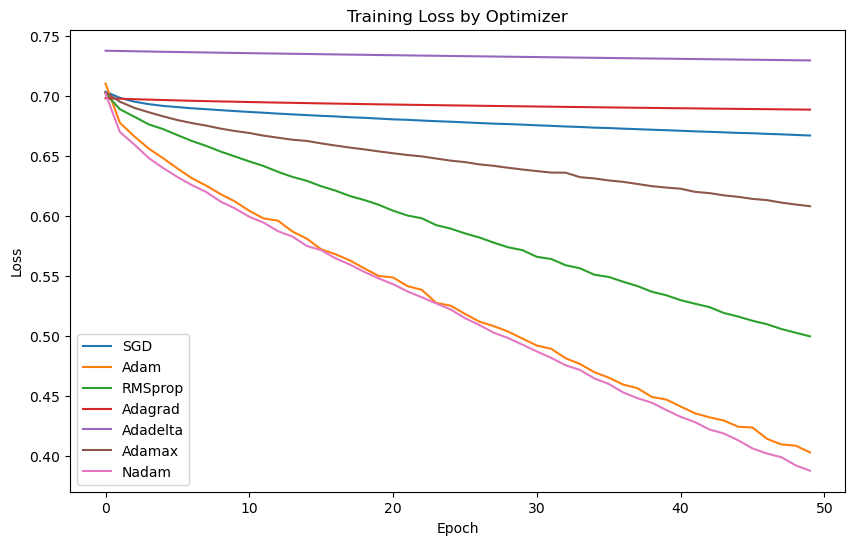

In [43]:
# Plot training history
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(result['history'].history['loss'], label=name)
plt.title('Training Loss by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

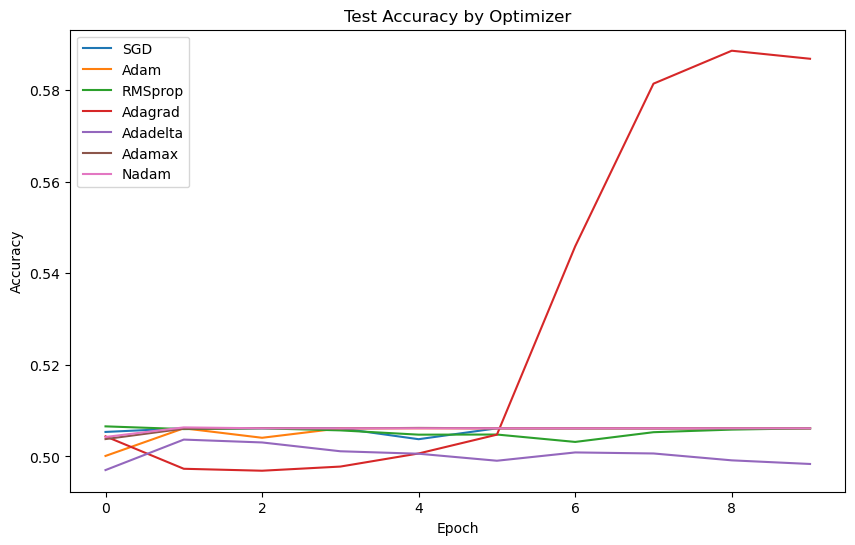

In [53]:
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.plot(result['history'].history['accuracy'], label=name)
plt.title('Test Accuracy by Optimizer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

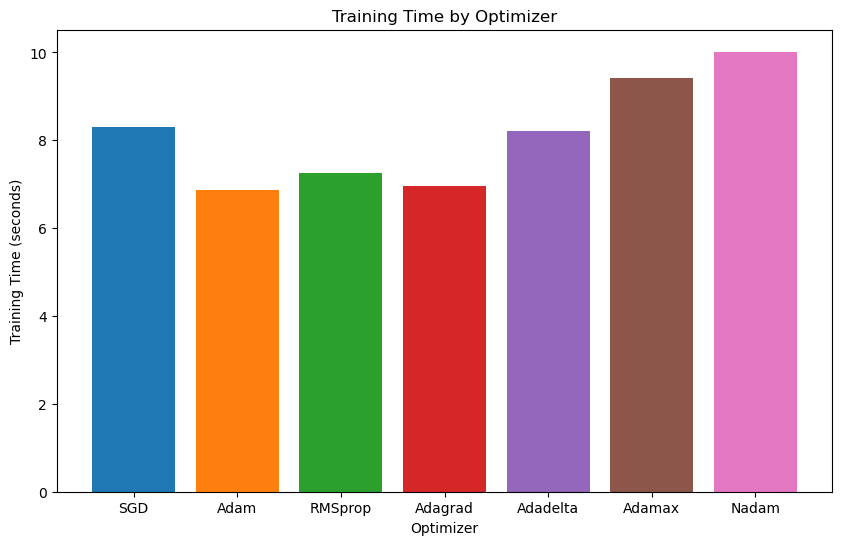

In [45]:
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.bar(name, result['training_time'])
plt.title('Training Time by Optimizer')
plt.xlabel('Optimizer')
plt.ylabel('Training Time (seconds)')
plt.show()